In [1]:
from ipywidgets import interactive
from IPython.display import display
import ipywidgets as widgets
from IPython.display import Image

## Missionaries and cannibals problem

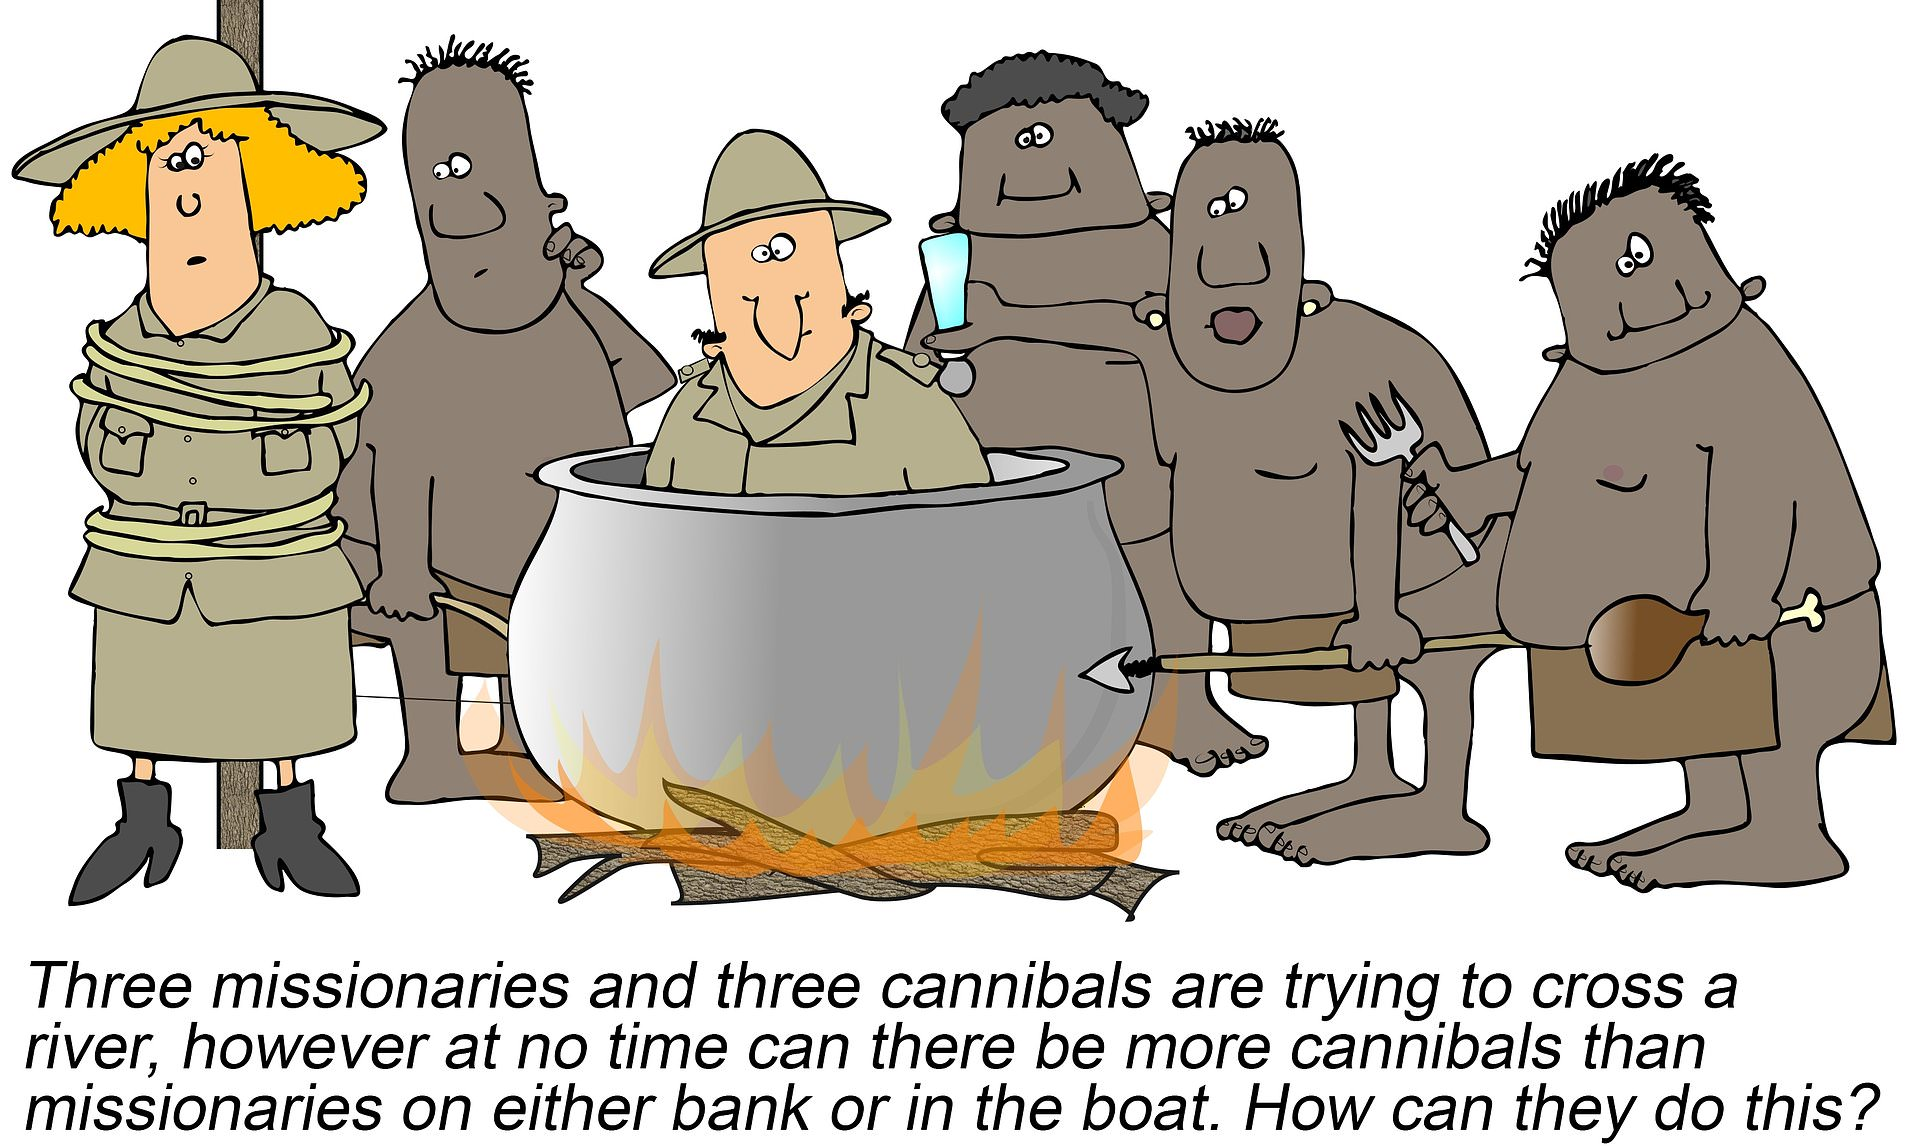

In [2]:
Image(filename = "mc.jpg", width = 500, height = 300)

### Search Algorithm: Breadth-first Search

In [3]:
class Queue:
    
    def __init__(self):
        self.queue = []
    
    def enqueue(self, node):
        self.queue.append(node)
        
    def dequeue(self):
        if not self.empty():
            return self.queue.pop(0)
        else:
            raise Exception("Queue Empty!")
            
    def empty(self):
        return len(self.queue) == 0
    
    def contains_state(self, state):
        return any(node.state == state for node in self.queue)
    
    def __str__(self):
        result = f"Number of items in queue = {len(self.queue)}\n"
        for item in self.queue:
            result += f"{item}\n"
        return result    

In [4]:
class Node:
    def __init__(self, state, parent, action, depth):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
    
    def repeated_state(self):
        if self.parent == None or self.parent.parent == None: 
            return False
        if self.parent.parent.state.equals(self.state): 
            return True
        return False
    
    def __str__(self):
        result = f"{self.state}"
        result += f" {self.depth}"
        if self.parent != None:
            result += f" {self.parent.state}"
            result += f" {self.action}"
        return result  

In [5]:
class Search:
    
    # Breadth-first Search
    
    def __init__(self, start_state, goal_state):

        self.start_state = start_state
        self.goal_state = goal_state
            
    def find_solution(self):
        
        # Initialize fringe
        start_node = Node(self.start_state, None, None, 0)
        fringe = Queue()
        fringe.enqueue(start_node)
        
        # Initialize an empty explored set
        self.explored = set()
        
        while not fringe.empty():
            
            # Choose a node from the fringe
            current_node = fringe.dequeue()
            
            # If the chosen node is the goal, then we have a solution
            if self.goal_state.equals(current_node.state):
                return current_node

            # Mark node as explored
            self.explored.add(current_node.state)
            
            # Add possible successors to the fringe
            successors = current_node.state.find_successors()
            for state, action in successors:   
                if not fringe.contains_state(state) and state not in self.explored and not state.illegal():
                    n = Node(state,
                             current_node,
                             action,
                             current_node.depth+1)
                    if n.repeated_state():
                        del(n)
                    else:
                        fringe.enqueue(n)
            #print(fringe)
        return None
    
    def build_path(self, node):
        result = []
        while node:
            result.insert(0, node)
            node = node.parent
        return result
    
    def show_path(self, node):
        step = 1
        path = self.build_path(node)        
        for current_node in path:
            if current_node.action:
                print(f"Step {current_node.depth}: {current_node.action}")
            #print(current_node.state)
        #print(f"\nNumber of steps = {current_node.depth}")
    
    def solve(self):
        if (self.start_state.m_count != 0 and self.start_state.m_count >= self.start_state.c_count) or self.start_state.m_count==0:
            solution = self.find_solution()
            if solution == None:
                print("Search failed :/")
            else:
                print("Search completed :)")
                print("\nSolution:\n")
                self.show_path(solution)
        else:
            print("Invalid Selection!!")
            print("Remember that the number of cannibals cannot be greater than the number of missionaries :/")
        

In [6]:
class MCB_State:
    
    """
    (#m, #c, #b)
    """

    def __init__(self, m_count, c_count, b_count):
        self.m_count = m_count
        self.c_count = c_count
        self.b_count = b_count
       
    def __str__(self):    
        return f"({self.m_count}, {self.c_count}, {self.b_count})"
    
    def equals(self, state):
        return (self.m_count == state.m_count and 
                self.c_count == state.c_count and 
                self.b_count == state.b_count)

    def illegal(self):
        global max_cannibals
        global max_missionaries
        if (self.m_count >= 0 
        and (max_missionaries - self.m_count) >= 0
        and self.c_count >= 0
        and (max_cannibals - self.c_count) >= 0):
            if self.m_count in [0, max_missionaries] or self.m_count == self.c_count:
                return False
            if self.m_count > self.c_count and (max_missionaries - self.m_count) > (max_cannibals - self.c_count):
                return False
        return True
    
    # There are five possible actions:
    # 1. Boat takes 1 missionary across river
    def take_1m(self):
        if self.b_count == 1:
            return MCB_State(self.m_count - 1, self.c_count, 0)
        return MCB_State(self.m_count + 1, self.c_count, 1)
    
    # 2. Boat takes 1 cannibal across the river
    def take_1c(self):
        if self.b_count == 1:
            return MCB_State(self.m_count, self.c_count - 1, 0)
        return MCB_State(self.m_count, self.c_count + 1, 1)
    
    # 3. Boat takes 2 missionaries across the river
    def take_2m(self):
        if self.b_count == 1:
            return MCB_State(self.m_count - 2, self.c_count, 0)
        return MCB_State(self.m_count + 2, self.c_count, 1)
    
    # 4. Boat takes 2 cannibals across the river
    def take_2c(self):
        if self.b_count == 1:
            return MCB_State(self.m_count, self.c_count - 2, 0)
        return MCB_State(self.m_count, self.c_count + 2, 1)
    
    # 5. Boat takes 1 missionary and 1 cannibal across the river
    def take_1m_1c(self):
        if self.b_count == 1:
            return MCB_State(self.m_count - 1, self.c_count - 1, 0)
        return MCB_State(self.m_count + 1, self.c_count + 1, 1)
        
    def find_successors(self):
        return [(self.take_1m(), "Boat takes 1 missionary across the river"), 
                (self.take_1c(), "Boat takes 1 cannibal across the river"),
                (self.take_2m(), "Boat takes 2 missionaries across the river"), 
                (self.take_2c(), "Boat takes 2 cannibals across the river"),
                (self.take_1m_1c(), "Boat takes 1 missionary and 1 cannibal across the river")]
    


In [7]:
max_cannibals = 0
max_missionaries = 0
count = 0

In [ ]:

def f(missionaries, cannibals):
    global count
    print(f"Test: {count}")
    count = count + 1
    boats=1
    global max_cannibals
    global max_missionaries
    max_cannibals = cannibals
    max_missionaries = missionaries
    if (missionaries > 0 and cannibals > 0) or (missionaries > 0 and cannibals == 0) or (missionaries == 0 and cannibals > 0):
        s = Search(MCB_State(missionaries, cannibals, boats), MCB_State(0,0,0))
        s.solve()
    else:
        print("Please use the sliders to choose the number of missionaries and cannibals")

In [ ]:
w = interactive(f, missionaries=widgets.IntSlider(min=0, max=3, step=1, value=0), cannibals=widgets.IntSlider(min=0, max=3, step=1, value=0))

In [ ]:
display(w)